In [1]:
# Encoding all types , column transformer , pipeline , outlier handling. 

In [81]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
#df.isnull().sum()

# label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lb = LabelEncoder() 

In [7]:
df['Gender'] = lb.fit_transform(df['Gender'])

In [8]:
x = df.drop(columns = ['Purchased'])
y = df['Purchased']

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# ordinal encoding

In [82]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [86]:
from sklearn.preprocessing import OrdinalEncoder

In [87]:
data = np.array(['Gender']).reshape(-1, 1) 
oe = OrdinalEncoder(categories=[['Gender']])

In [88]:
oe_sc = oe.fit_transform(data)

In [89]:
oe_sc

array([[0.]])

# onehot encoding

In [16]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [17]:
from sklearn.preprocessing import OneHotEncoder 

In [18]:
ohe = OneHotEncoder(drop = 'first' , sparse_output = False , dtype = np.int32)

In [19]:
df_new = ohe.fit_transform(df[['Gender']])

In [20]:
df_new

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

# get dummies

In [21]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [22]:
df_new = pd.get_dummies(df , drop_first =True , columns = ['Gender'])

In [23]:
df_new.astype(int)

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


# pipeline

In [24]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(columns = ['Purchased'])
y = df['Purchased']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)
                                                       

In [27]:
categorical_features = ['Gender']
numeric_features = ['User ID','Age','EstimatedSalary']

In [28]:
# create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler' , StandardScaler())
])

categorical_transformer =  Pipeline(steps=[
    ('onehot' ,OneHotEncoder(handle_unknown='ignore'))
])

# combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# create the pipeline

clf = Pipeline(steps=[('preprocessor' , preprocessor),
                      ('classifier', LogisticRegression())])

# train the model
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
acc = accuracy_score(y_test , y_pred)

In [31]:
acc

0.8875

# ColumTransformer

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [33]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [34]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(df.drop(
    columns = ['Purchased']) , df['Purchased'] , test_size = 0.2)

In [35]:
x_train

,User ID,Gender,Age,EstimatedSalary
288,15649668,Male,41,79000
38,15671766,Female,26,72000
77,15774179,Female,22,27000
346,15646936,Male,53,72000
353,15750335,Female,37,57000
...,...,...,...,...
49,15793813,Female,31,89000
282,15750447,Male,37,70000
186,15724402,Female,20,82000
109,15697997,Female,38,80000


In [36]:
# ordinal encoding -->

oe = OrdinalEncoder(categories = [['Female' , 'Male']])
x_train_cough = oe.fit_transform(x_train[['Gender']])

x_test_cough = oe.fit_transform(x_test[['Gender']])

x_train_cough.shape

(320, 1)

In [37]:
# extracting Age

x_train_Age = x_train.drop(columns=
                           ['User ID','Gender','EstimatedSalary']).values

# also the test data

x_test_Age = x_test.drop(columns =
                          ['User ID','Gender','EstimatedSalary']).values

In [38]:
x_train_Age.shape

(320, 1)

In [39]:
x_train_UserID = x_train[['User ID']].values
x_train_Age = x_train[['Age']].values


x_train_transformed = np.concatenate((x_train_UserID,
                                      x_train_cough,
                                      x_train_Age), axis=1)

In [40]:
x_train_transformed.shape

(320, 3)

In [41]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    

    ('tnf' , OrdinalEncoder(categories = [['Female' , 'Male']]) , ['Gender'])] ,  remainder = 'passthrough')

In [42]:
transformer.fit_transform(x_train).shape

(320, 4)

In [43]:
transformer.transform(x_test).shape

(80, 4)

# outlier handling

In [65]:
df = pd.read_csv("titanic.csv")

In [66]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age'>

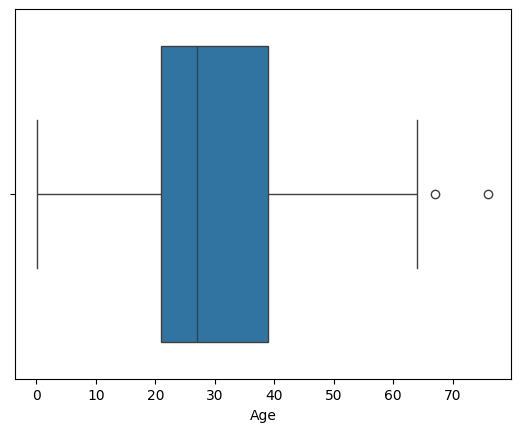

In [68]:
sns.boxplot(x= df['Age'])

In [69]:
# finding the IRQ

percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [70]:
print(percentile25)
print(percentile75)

21.0
39.0


In [71]:
IQR = percentile75 - percentile25
IQR

np.float64(18.0)

In [72]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(66.0)

In [73]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-6.0)

# find outlier¶

In [74]:
df[df['Age']> upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [75]:
df[df['Age']< lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# trimming

In [76]:
newdf = df[df['Age'] < upper_limit]

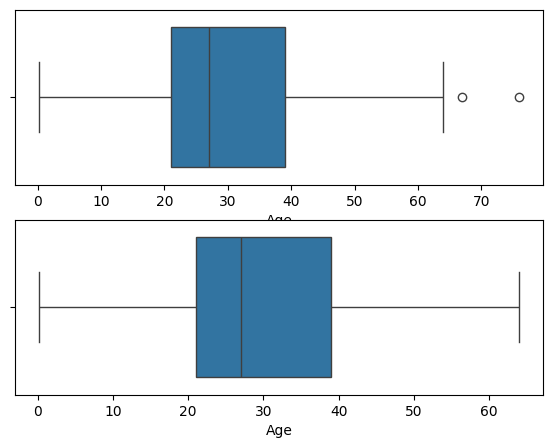

In [77]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x = df['Age'])
plt.subplot(224)
sns.boxplot(x = newdf['Age'])
plt.show()

# capping

In [78]:
new_df_cap = df.copy()

In [79]:
new_df_cap['Age'] = np.where(
    
    new_df_cap['Age'] > upper_limit , 
    upper_limit , 
    
    np.where(
    new_df_cap['Age'] < lower_limit , 
    lower_limit , 
    new_df_cap['Age'])


)

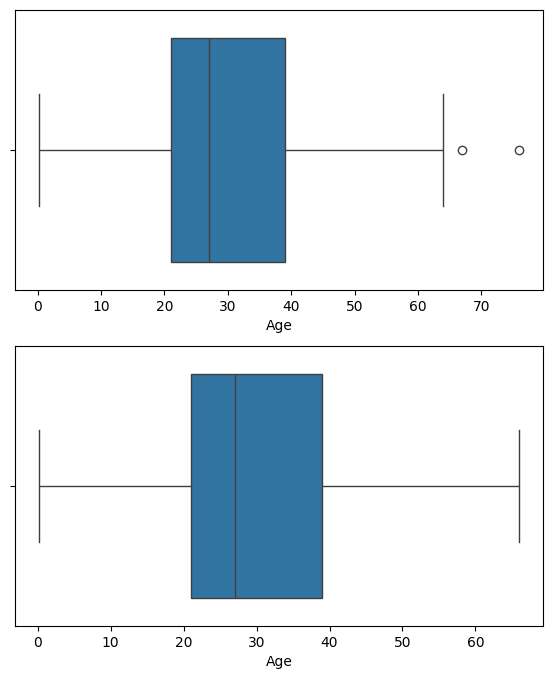

In [80]:
plt.figure(figsize = (15,8))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x= new_df_cap['Age'])
plt.show()